# Logistic Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Data

In [2]:
ad_data = pd.read_csv('advertising.csv')
ad_data.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

In [3]:
# Explore data

ad_data.describe()

Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
mean                  65.000200    36.009000  55000.000080   
std                   15.853615     8.785562  13414.634022   
min                   32.600000    19.000000  13996.500000   
25%                   51.360000    29.000000  47031.802500   
50%                   68.215000    35.000000  57012.300000   
75%                   78.547500    42.000000  65470.635000   
max                   91.430000    61.000000  79484.800000   

       Daily Internet Usage         Male  Clicked on Ad  
count           1000.000000  1000.000000     1000.00000  
mean             180.000100     0.481000        0.50000  
std               43.902339     0.499889        0.50025  
min              104.780000     0.000000        0.00000  
25%              138.830000     0.000000        0.00000  
50%              183.130000     0.000000        0.50000  
75%              218.792500     1.000000        1.00000  
max              269.960000     1.000000        1.00000

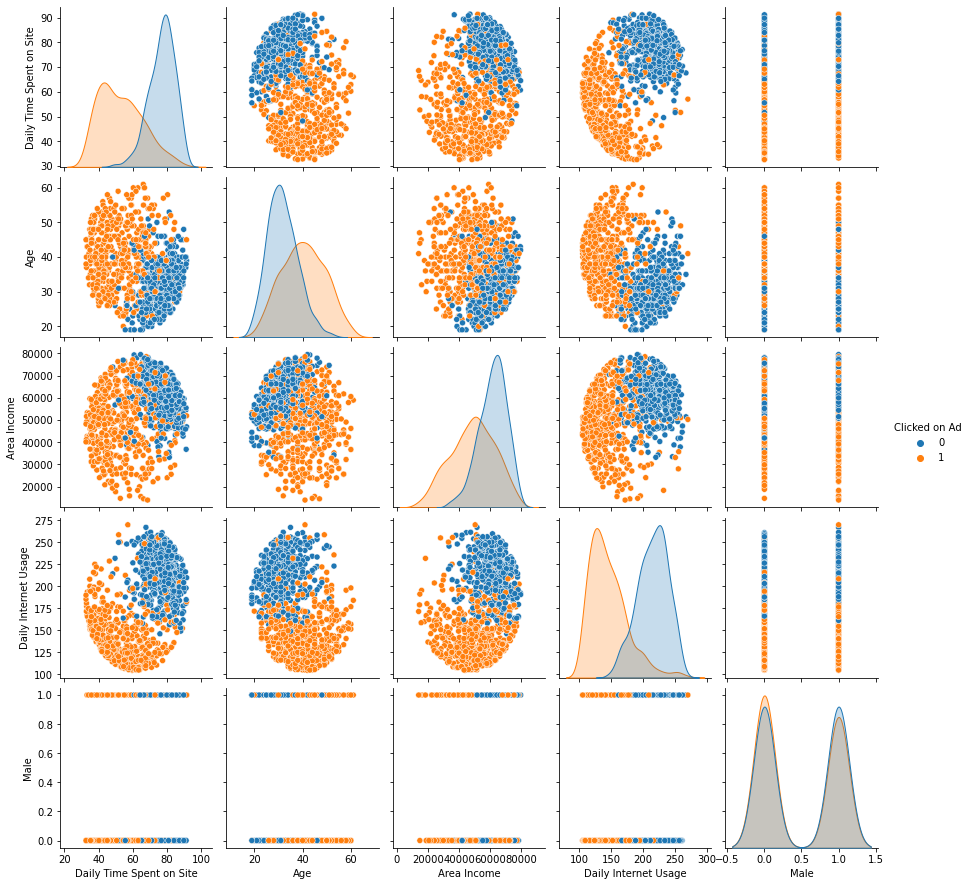

In [4]:
# Analyse correlations

sns.pairplot(ad_data, hue='Clicked on Ad')

## Train Logistic Regression Model

In [5]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [6]:
# Training data and labels

X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']]
y = ad_data['Clicked on Ad']

In [7]:
# Train / test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
# Train logistic regression model

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

log_model.fit(X_train, y_train)

LogisticRegression()

## Model Evaluation

In [10]:
# Get predictions from test data

X.iloc[58]

Daily Time Spent on Site       77.63
Age                            29.00
Area Income                 56113.37
Daily Internet Usage          239.22
Name: 58, dtype: float64

In [11]:
y.iloc[58]

0

In [12]:
log_model.predict([X.iloc[58]])

array([0])

In [14]:
# Evaluation metrics

predictions = log_model.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[145  11]
 [ 20 124]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       156
           1       0.92      0.86      0.89       144

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [18]:
pd.DataFrame(log_model.coef_, columns=['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'])

Daily Time Spent on Site       Age  Area Income  Daily Internet Usage
0                 -0.055281  0.272217    -0.000019             -0.027249